# Capacitated Vehicle Routing Problem

<img src="http://neo.lcc.uma.es/dynamic/images/vrp.png" width="400" />

- $n$ is the number of clientes
- $N$ is set of clients, with $N=\{1,2,...,n\}$
- $V$ is set of vetices (or nodes), with $V=\{0\}\cup N$
- $A$ is set of arcs, with $A=\{(i,j)\in V^2 : i\neq j\}$
- $c_{ij}$ is cost of travel over arc $(i,j)\in A$
- $Q$ is the vehicle capacity
- $q_i$ is the amount that has to be delivered to customer $i\in N$

Then, the formulation is the following
$$\begin{align}
\min \quad & \sum_{i,j\in A} c_{ij} x_{ij} \\
\text{s.t.} \quad & \sum_{j\in V , j\neq i} x_{ij} = 1  && i \in N \\
& \sum_{i\in V , i\neq j} x_{ij} = 1 && j \in N \\
& \text{if} \ x_{ij}=1 \ \Rightarrow \ u_i + q_j = u_j && i,j \in A : j\neq 0, i\neq 0 \\
& q_i \leq u_i \leq Q && i \in N \\
& x_{ij} \in \{0,1\} && i,j \in A
\end{align}$$

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model

In [26]:
file_path = 'dataset.txt'
column_names = ["CUST NO.", "XCOORD.", "YCOORD.", "DEMAND", "READY TIME", "DUE DATE", "SERVICE TIME"]

df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)
df = df.head(11)

df.head()

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME
0,1,35.0,35.0,0.0,0.0,230.0,0.0
1,2,41.0,49.0,10.0,161.0,171.0,10.0
2,3,35.0,17.0,7.0,50.0,60.0,10.0
3,4,55.0,45.0,13.0,116.0,126.0,10.0
4,5,55.0,20.0,19.0,149.0,159.0,10.0


In [27]:
xc = df['XCOORD.'].values
yc = df['YCOORD.'].values

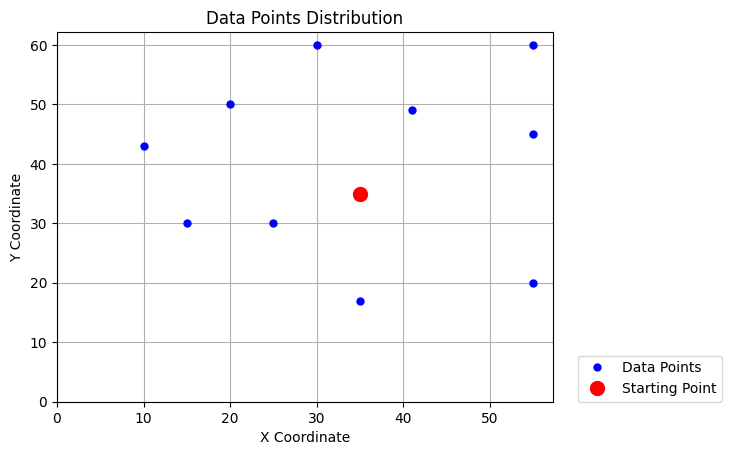

In [28]:
plt.plot(df["XCOORD."], df["YCOORD."], ".", color="blue", markersize=10, label="Data Points")
plt.plot(df["XCOORD."][0], df["YCOORD."][0], "o", color="red", markersize=10, label="Starting Point")

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Data Points Distribution")

plt.xlim(0)
plt.ylim(0)

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
plt.show()

In [29]:
n = len(df)-1
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}
Q = 200
q = df['DEMAND'].values

In [30]:
mdl = Model('CVRP')

In [31]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [32]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               15
Found incumbent of value 434.721651 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 0 columns.
MIP Presolve modified 45 coefficients.
Aggregator did 45 substitutions.
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.01 sec. (0.35 ticks)
Probing time = 0.00 sec. (0.32 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.00 sec. (0.23 ticks)
Probing time = 0.00 sec. (0.31 ticks)
Clique table members: 65.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation 

      0     0      160.2629    20      189.7056  Impl Bds: 10       30   15.52%
*     0+    0                          185.4332      160.2629            13.57%
*     0+    0                          182.0588      160.2629            11.97%
Detecting symmetries...
      0     2      160.2629    10      182.0588      160.2629       30   11.97%
Elapsed time = 0.08 sec. (4.08 ticks, tree = 0.02 MB, solutions = 4)
*    33+    8                          173.0420      160.6820             7.14%

Clique cuts applied:  5
Implied bound cuts applied:  42

Root node processing (before b&c):
  Real time             =    0.08 sec. (4.04 ticks)
Parallel b&c, 8 threads:
  Real time             =    0.01 sec. (2.19 ticks)
  Sync time (average)   =    0.01 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.09 sec. (6.23 ticks)


In [33]:
print(solution)

solution for: CVRP
objective: 173.042
status: OPTIMAL_SOLUTION(2)
x_0_6=1
x_1_9=1
x_2_0=1
x_3_4=1
x_4_2=1
x_5_8=1
x_6_5=1
x_7_10=1
x_8_7=1
x_9_3=1
x_10_1=1
u_1=69.000
u_2=124.000
u_3=98.000
u_4=117.000
u_5=29.000
u_6=3.000
u_7=43.000
u_8=38.000
u_9=85.000
u_10=59.000



In [34]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [35]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

(7.75, 57.25, 14.85, 62.15)

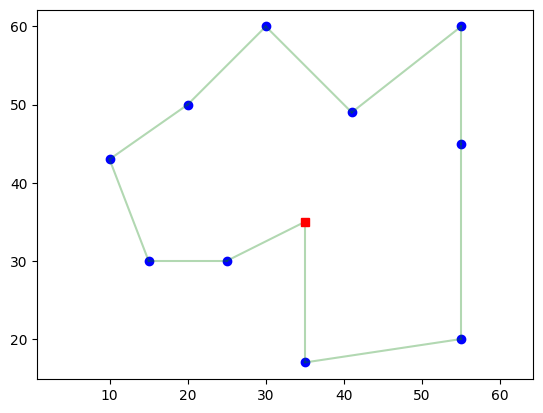

In [41]:
plt.scatter(xc[1:], yc[1:], c='b')

for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', alpha=0.3)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.axis('equal')